## Examen Práctico - Karime Jiménez Romero

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import load_model

In [76]:
brain_path = r"C:\Users\karim\OneDrive\Documentos\Neurociencias-2025-2\S03_datasets\Brain_tumor\Brain Tumor\Brain Tumor"
brain_csv = pd.read_csv(r"C:\Users\karim\OneDrive\Documentos\Neurociencias-2025-2\S03_datasets\Brain_tumor\Brain Tumor.csv")

In [77]:
brain_csv['Image'] = brain_csv['Image'].astype(str) + ".jpg" #extensión
brain_csv['filepath'] = brain_csv['Image'].apply(lambda x: os.path.join(brain_path, x))
brain_csv['Class'] = pd.to_numeric(brain_csv['Class'], errors='coerce')

# dataset
filepaths = brain_csv['filepath'].values
labels = brain_csv['Class'].values

dataset = tf.data.Dataset.from_tensor_slices((filepaths, labels))

In [78]:
def load_image(filepath, label):
    image = tf.io.read_file(filepath)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [128, 128])
    return image, label

dataset = dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)

In [79]:
total = len(filepaths)
train_size = int(0.8 * total)
train_dataset = (
    dataset.take(train_size)
    .shuffle(1000)
    .batch(32)
    .prefetch(tf.data.AUTOTUNE)
)

val_dataset = (
    dataset.skip(train_size)
    .batch(32)
    .prefetch(tf.data.AUTOTUNE)
)

1. Aplicar modelo CNN

In [82]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape =  (130,130,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(120, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = "sigmoid")
])

model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

C:\Users\karim\PycharmProjects\pythonProject\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=val_dataset,
)
print("Accuracy", history.history["val_accuracy"][-1])

Epoch 1/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 111s 885ms/step - accuracy: 0.7508 - loss: 0.4951 - val_accuracy: 0.8167 - val_loss: 0.4166
Epoch 2/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.8468 - loss: 0.3682 - val_accuracy: 0.7915 - val_loss: 0.4174
Epoch 3/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 74s 758ms/step - accuracy: 0.7903 - loss: 0.4671 - val_accuracy: 0.8327 - val_loss: 0.3512
Epoch 4/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 73s 753ms/step - accuracy: 0.8866 - loss: 0.2823 - val_accuracy: 0.7928 - val_loss: 0.4679
Epoch 5/5
95/95 ━━━━━━━━━━━━━━━━━━━━ 72s 743ms/step - accuracy: 0.9012 - loss: 0.2383 - val_accuracy: 0.8619 - val_loss: 0.3150
Accuracy 0.8618857860565186


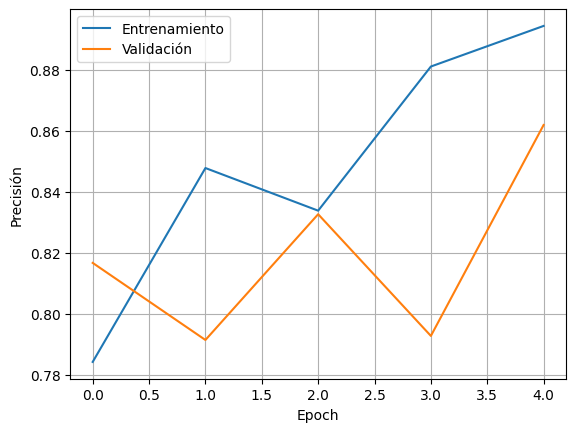

In [95]:
plt.plot(history.history["accuracy"], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel("Epoch")
plt.ylabel('Precisión')
plt.legend()
plt.grid()
plt.show()

2. Mejorar modelo

In [22]:
model2 = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(130,130,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    LeakyReLU(alpha=0.1),

    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model2.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

C:\Users\karim\PycharmProjects\pythonProject\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\karim\PycharmProjects\pythonProject\.venv\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [29]:
history2 = model2.fit(
    train_dataset,
    epochs=10,
    validation_data=val_dataset,
)
print("Accuracy mejorado", history2.history["val_accuracy"][-1])

Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.9790 - loss: 0.0653 - val_accuracy: 0.9097 - val_loss: 0.2703
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 73s 750ms/step - accuracy: 0.9591 - loss: 0.1159 - val_accuracy: 0.9469 - val_loss: 0.1739
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.9900 - loss: 0.0361 - val_accuracy: 0.9482 - val_loss: 0.1703
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.9923 - loss: 0.0280 - val_accuracy: 0.9482 - val_loss: 0.2063
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.9894 - loss: 0.0379 - val_accuracy: 0.9482 - val_loss: 0.1691
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.9912 - loss: 0.0302 - val_accuracy: 0.9376 - val_loss: 0.2629
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.9977 - loss: 0.0106 - val_accuracy: 0.9535 - val_loss: 0.2167
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.9982 - loss: 0.0101 - val_accuracy: 0.9469 -

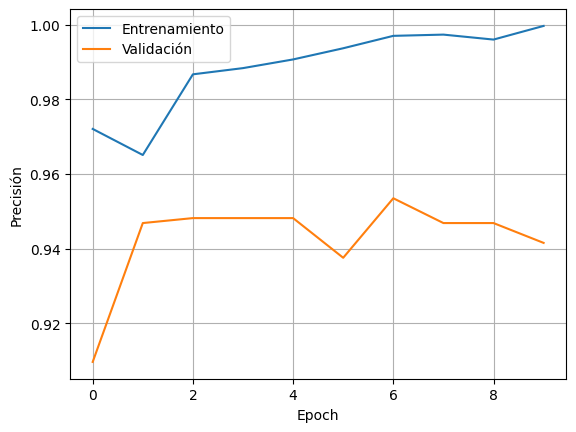

In [96]:
plt.plot(history2.history["accuracy"], label='Entrenamiento')
plt.plot(history2.history['val_accuracy'], label='Validación')
plt.xlabel("Epoch")
plt.ylabel('Precisión')
plt.legend()
plt.grid()
plt.show()

In [33]:
model.save("Modelo1.keras")
model2.save("Modelo2.keras")

In [37]:
# comparando modelos
model = load_model("Modelo1.keras")
model2 = load_model("Modelo2.keras")

loss_1, acc_1 = model.evaluate(val_dataset, verbose=0)
loss_2, acc_2 = model2.evaluate(val_dataset, verbose=0)

In [38]:
resultados = pd.DataFrame({
    "Modelos":["Modelo base", "Modelo mejorado"],
    "Accuracy": [acc_1,acc_2]
})
print(resultados)

           Modelos  Accuracy
0      Modelo base  0.837981
1  Modelo mejorado  0.941567


3. Comparación entre modelos

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [85]:
X = brain_csv.drop(columns = ["Image", "filepath", "Class"])
y = brain_csv ["Class"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
rf_acc = accuracy_score(y_val, y_pred)
print("Accuracy RF:", rf_acc)

Accuracy RF: 0.9814077025232404


In [91]:
# SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_acc = accuracy_score(y_val, y_pred)
print("Accuracy SVM:", svm_acc)

Accuracy SVM: 0.9814077025232404


In [92]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_acc = accuracy_score(y_val, y_pred)
print("Accuracy LR:", lr_acc)

Accuracy LR: 0.9814077025232404


C:\Users\karim\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_acc = accuracy_score(y_val, y_pred)
print("Accuracy KNN:", knn_acc)

Accuracy RF: 0.9814077025232404


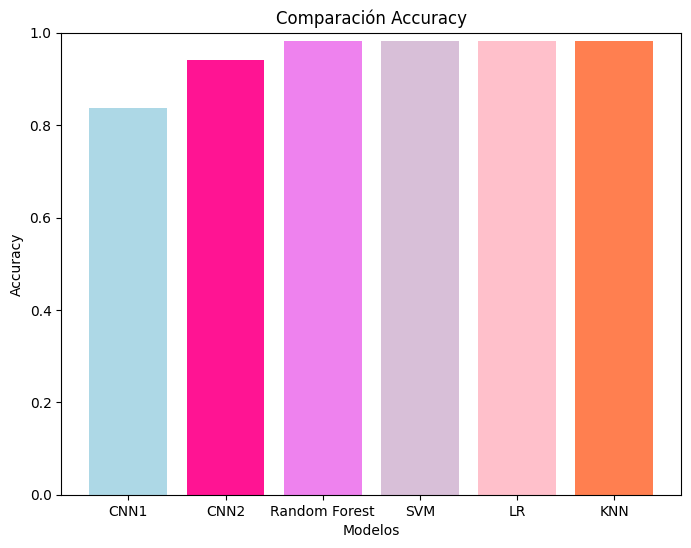

In [94]:
# graficar comparacion modelos
models = ["CNN1", "CNN2", "Random Forest", "SVM", "LR", "KNN"]
accuracies = [acc_1, acc_2, rf_acc, svm_acc, lr_acc, knn_acc]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=["lightblue", "deeppink", "violet", "thistle", "pink", "coral"])
plt.ylim(0, 1)
plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title("Comparación Accuracy")
plt.show()